In [51]:
import pandas as pd # import it with an alias to make it easier to call its functions ie Data Frame
import seaborn as sns #Seaborn is a Python library that provides a high-level interface for creating attractive and informative statistical graphics
import numpy as np # fundamental package required for high performance scientific computing and data analysis
import matplotlib.pyplot as plt # plotting library for the Python programming language and its numerical mathematics extension NumPy
import altair as alt #Altair is a statistical visualization library in Python It is a declarative in nature and is based on Vega and Vega-Lite visualization 
OT = pd.read_csv('climate_change_impact_on_agriculture_2024 - Copy.csv') #  importing and reading Data set from the Data Base  

In [4]:
OT

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022,France,Nouvelle-Aquitaine,Cotton,30.48,685.93,17.64,3.033,9,27.56,41.96,10.95,43.41,No Adaptation,1483.06
9996,1999,Australia,Queensland,Soybeans,9.53,2560.38,10.68,2.560,4,77.02,5.45,82.32,59.39,No Adaptation,829.61
9997,2000,Argentina,Patagonia,Coffee,31.92,357.76,26.01,1.161,10,78.53,11.94,26.00,41.46,Water Management,155.99
9998,1996,Brazil,Southeast,Soybeans,13.95,1549.52,17.31,3.348,2,42.65,44.71,25.07,75.10,Crop Rotation,1613.90


In [109]:
# 1) Calculate Average Crop Yield by Country and Crop Type
filter = OT.groupby(['Country', 'Crop_Type', 'Year'])['Crop_Yield_MT_per_HA'].mean().reset_index() # Calculate the mean for each group.
filter = filter.round(2) # Apply round to the resulting Series.
filter

,Country,Crop_Type,Year,Crop_Yield_MT_per_HA
0,Argentina,Barley,1990,2.15
1,Argentina,Barley,1991,1.21
2,Argentina,Barley,1992,3.14
3,Argentina,Barley,1993,2.23
4,Argentina,Barley,1994,1.62
...,...,...,...,...
3286,USA,Wheat,2020,0.97
3287,USA,Wheat,2021,2.53
3288,USA,Wheat,2022,2.84
3289,USA,Wheat,2023,1.69


In [13]:
#2) Identify Countries with Extreme Weather Events
filtered = OT [ OT['Extreme_Weather_Events'] > 0]
Extreme_Weather_Events = filtered[['Country', 'Year', 'Extreme_Weather_Events']]
Extreme_Weather_Events

,Country,Year,Extreme_Weather_Events
0,India,2001,8
1,China,2024,8
2,France,2001,5
3,Canada,2001,5
4,India,1998,9
...,...,...,...
9995,France,2022,9
9996,Australia,1999,4
9997,Argentina,2000,10
9998,Brazil,1996,2


In [69]:
# 3) Find Top 5 Countries by CO2 Emissions
top_5_countries_by_co2 = OT [['Year', 'Country', 'CO2_Emissions_MT']].sort_values(by = 'CO2_Emissions_MT', ascending = False).head(5)
top_5_countries_by_co2                              

,Year,Country,CO2_Emissions_MT
5067,1998,Australia,30.00
1423,1998,India,30.00
4094,2018,China,29.99
8008,2019,Russia,29.98
813,2017,India,29.98


In [43]:
#4) Calculate the Total Economic Impact of Extreme Weather Events per Region
total_economic_impact_per_region = OT.groupby('Region')['Economic_Impact_Million_USD'].sum().reset_index()
total_economic_impact_per_region

,Region,Economic_Impact_Million_USD
0,British Columbia,164990.42
1,Central,320899.48
2,East,184906.36
3,Grand Est,165383.82
4,Ile-de-France,166040.87
5,Maharashtra,145760.51
6,Midwest,163504.77
7,New South Wales,187542.90
8,North,344558.76
9,North Central,172510.90


In [81]:
#5) List 5 Countries with Irrigation Access Below 50%
countries_B50_irragation = OT[OT['Irrigation_Access_%'] < 50].reset_index()
unique_countries = countries_B50_irragation['Country'].unique().tolist()
unique_countries

['India',
 'China',
 'Argentina',
 'Nigeria',
 'Russia',
 'Brazil',
 'Australia',
 'France',
 'Canada',
 'USA']

In [19]:
#6) Find the Year with the Highest Fertilizer Use in a Specific Country
country_fertilizer = OT[OT.Country == input('please type a country to display year of highest fertilizer use')].groupby('Year')['Fertilizer_Use_KG_per_HA'].sum()
year_highest_fertilizer = country_fertilizer.idxmax()
year_highest_fertilizer

please type a country to display year of highest fertilizer use Australia


2001

In [89]:
#7) Compare Average Temperatures by Region Over the Last 5 Years
last_5_years = OT[OT['Year'] >= OT['Year'].max() - 4]
average_temperatures_by_region = last_5_years.groupby('Region')['Average_Temperature_C'].mean().round(2).reset_index()
average_temperatures_by_region

,Region,Average_Temperature_C
0,British Columbia,10.48
1,Central,13.73
2,East,13.77
3,Grand Est,17.55
4,Ile-de-France,17.14
5,Maharashtra,17.31
6,Midwest,15.72
7,New South Wales,13.70
8,North,15.81
9,North Central,11.22


In [91]:
#8) Find Regions with Crop Yield Decline Despite Adaptation Strategies
'''''
region_adaptation_yield = OT.groupby(['Region', 'Adaptation_Strategies'])['Crop_Yield_MT_per_HA'].mean().round(2)
adapted_regions = region_adaptation_yield[region_adaptation_yield['Adaptation_Strategies'] != 'No Adaptation']
sorted_regions = adapted_regions.sort_values('Crop_Yield_MT_per_HA')
print(sorted_regions)
'''''

region_adaptation_yield = OT.groupby(['Region', 'Adaptation_Strategies'])['Crop_Yield_MT_per_HA'].mean().round(2).reset_index()
adapted_regions = region_adaptation_yield[region_adaptation_yield['Adaptation_Strategies'] != 'No Adaptation']
sorted_regions = adapted_regions.sort_values('Crop_Yield_MT_per_HA')
sorted_regions


,Region,Adaptation_Strategies,Crop_Yield_MT_per_HA
83,Pampas,Organic Farming,1.91
134,South West,Water Management,1.99
30,Midwest,Crop Rotation,1.99
15,Grand Est,Crop Rotation,2.00
21,Ile-de-France,Drought-resistant Crops,2.01
...,...,...,...
3,British Columbia,Organic Farming,2.51
130,South West,Crop Rotation,2.52
20,Ile-de-France,Crop Rotation,2.59
139,Southeast,Water Management,2.65


In [103]:
#9) Calculate the Total Pesticide and Fertilizer Use per Year for Each Country
grouped_data = OT.groupby(['Year', 'Country'])
total_pesticide_fertilizer = grouped_data.agg({'Pesticide_Use_KG_per_HA': 'sum', 'Fertilizer_Use_KG_per_HA': 'sum'}).reset_index()
total_pesticide_fertilizer

,Year,Country,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA
0,1990,Argentina,657.71,1202.53
1,1990,Australia,534.37,1440.39
2,1990,Brazil,383.34,812.55
3,1990,Canada,698.24,1546.23
4,1990,China,836.59,1209.45
...,...,...,...,...
345,2024,France,631.03,1319.52
346,2024,India,776.71,1162.85
347,2024,Nigeria,633.88,1279.79
348,2024,Russia,541.61,1150.81


In [71]:
# 10) Analyze the Relationship Between Precipitation and Crop Yield
correlation = OT['Total_Precipitation_mm'].corr(OT['Crop_Yield_MT_per_HA'])
print(f"Correlation Coefficient\nIn Precipitaion and crop yield is {round(correlation, 2)}")

Correlation Coefficient
In Precipitaion and crop yield is 0.03


In [95]:
#11) Use Measures of Central Tendency
country = input('Please type a country\nfirst latter upper case please')  # will give u the ability to Choose country 
crop_type = input('Please type a crope type small caps please')  # will give u the ability to Choose Crop_type
filtered_data = OT[(OT['Country'] == country) & (OT['Crop_Type'] == crop_type)]

# it will Check if the filtered DataFrame is empty before calculating the mode
if not filtered_data.empty:
    mean_yield = filtered_data['Crop_Yield_MT_per_HA'].mean().sum(2) # calculating the mean
    median_yield = filtered_data['Crop_Yield_MT_per_HA'].median().sum(2) # calculating the median 
    mode_yield = filtered_data['Crop_Yield_MT_per_HA'].mode().sum(2)[0] # calculating the mode

    print(f"Mean Yield for {crop_type} in {country}: {mean_yield}")
    print(f"Median Yield for {crop_type} in {country}: {median_yield}")
    print(f"Mode Yield for {crop_type} in {country}: {mode_yield}")
else:
    print(f"No available data for this crope type sorry {crop_type} in {country}.") # will print out if results not matched 

Please type a country
first latter upper case please France
Please type a crope type small caps please banana


No available data for this crope type sorry banana in France.


In [97]:
#12) Use Measures of Dispersion
prompt = "Using dataframe OT: Use Measures of Dispersion"

numerical_columns = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD']
std_dev = OT[numerical_columns].std()

range_values = OT[numerical_columns].max() - OT[numerical_columns].min()

variance = OT[numerical_columns].var()

std_dev = std_dev.round(2)
range_values = range_values.round(2)
variance = variance.round(2)

print("Standard Deviation:\n", std_dev)
print("\nRange:\n", range_values)
print("\nVariance:\n", variance)

Standard Deviation:
 Average_Temperature_C           11.47
Total_Precipitation_mm         805.02
CO2_Emissions_MT                 8.59
Crop_Yield_MT_per_HA             1.00
Extreme_Weather_Events           3.17
Irrigation_Access_%             25.99
Pesticide_Use_KG_per_HA         14.49
Fertilizer_Use_KG_per_HA        28.71
Soil_Health_Index               20.20
Economic_Impact_Million_USD    414.59
dtype: float64

Range:
 Average_Temperature_C            39.99
Total_Precipitation_mm         2799.52
CO2_Emissions_MT                 29.50
Crop_Yield_MT_per_HA              4.55
Extreme_Weather_Events           10.00
Irrigation_Access_%              89.98
Pesticide_Use_KG_per_HA          49.99
Fertilizer_Use_KG_per_HA         99.98
Soil_Health_Index                70.00
Economic_Impact_Million_USD    2298.63
dtype: float64

Variance:
 Average_Temperature_C             131.49
Total_Precipitation_mm         648052.07
CO2_Emissions_MT                   73.78
Crop_Yield_MT_per_HA               

In [105]:
#13) Use Frequency and Percentages
crop_type_counts = OT['Crop_Type'].value_counts()
crop_type_percentages = OT['Crop_Type'].value_counts(normalize=True) * 100
crop_type_summary = pd.DataFrame({'Frequency': crop_type_counts, 'Percentage': crop_type_percentages}).reset_index()
crop_type_summary


,Crop_Type,Frequency,Percentage
0,Wheat,1047,10.47
1,Cotton,1044,10.44
2,Vegetables,1036,10.36
3,Corn,1022,10.22
4,Rice,1022,10.22
5,Sugarcane,995,9.95
6,Fruits,979,9.79
7,Soybeans,958,9.58
8,Barley,952,9.52
9,Coffee,945,9.45


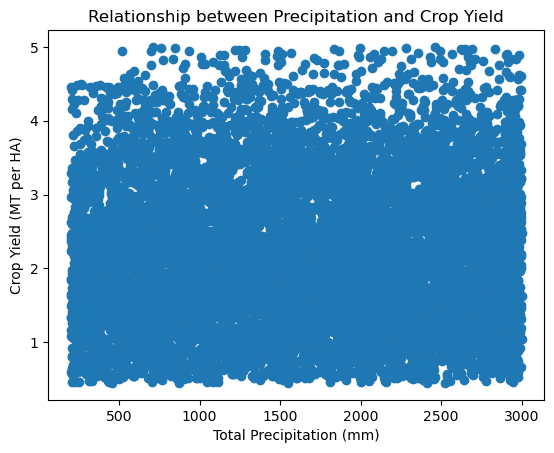

In [63]:
''''''''''' 
10) Analyze the Relationship Between Precipitation and Crop Yield
correlation = OT['Total_Precipitation_mm'].corr(OT['Crop_Yield_MT_per_HA'])
print(f"Correlation Coefficient: {round(correlation, 2)}")

-we were trying to add the the below values to the scatter plote 
-Scatter Plot with a Line of Regression
-a Line of Regression wasnt included 
-Extract the columns into variables
'''''''''''

Total_Precipitation_mm = OT['Total_Precipitation_mm']  
Crop_Yield_MT_per_HA = OT['Crop_Yield_MT_per_HA']

# Create the scatter plot
x = np.array(Total_Precipitation_mm) # extract data from column 
y = np.array(Crop_Yield_MT_per_HA)  # extract data from column 
plt.scatter(x, y)
plt.xlabel("Total Precipitation (mm)")  # Add labels for clarity
plt.ylabel("Crop Yield (MT per HA)")
plt.title("Relationship between Precipitation and Crop Yield")
plt.show()

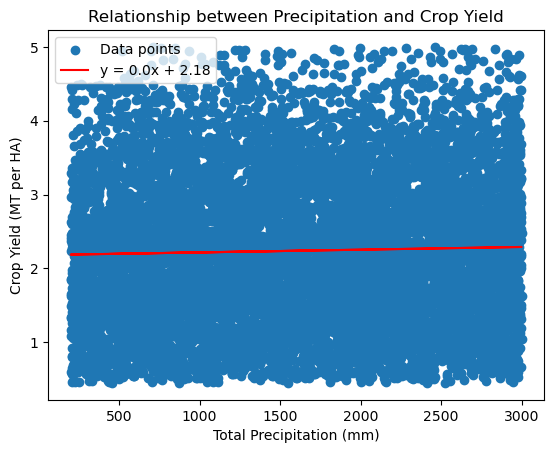

In [5]:
'''''''''''
Q 10) Scatter Plot with a Line of Regression
-this scater plot contains the line of regression 
'''''''''''
Total_Precipitation_mm = OT['Total_Precipitation_mm']  
Crop_Yield_MT_per_HA = OT['Crop_Yield_MT_per_HA']

x = np.array(Total_Precipitation_mm)  # extract data from column 
y = np.array(Crop_Yield_MT_per_HA)  # extract data from column 
plt.scatter(x, y, label="Data points")

slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept

plt.plot(x, regression_line, color='red', label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")

plt.xlabel("Total Precipitation (mm)")
plt.ylabel("Crop Yield (MT per HA)")
plt.title("Relationship between Precipitation and Crop Yield")

plt.legend()